In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
upload=files.upload()

Saving SalaryData_Train(1)(1).csv to SalaryData_Train(1)(1).csv


In [3]:
upload= files.upload()

Saving SalaryData_Test(1)(1).csv to SalaryData_Test(1)(1).csv


In [4]:
data_train=pd.read_csv('SalaryData_Train(1)(1).csv')
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
data_test=pd.read_csv('SalaryData_Test(1)(1).csv')
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [21]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [22]:
data_train.nunique()

age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64

In [23]:
columns=['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for i in columns:
  print(i,"-",'\t')
  print(data_train[i].value_counts())

workclass - 	
2    11021
4     1297
1     1033
5      667
3      572
0      463
6        7
Name: workclass, dtype: int64
education - 	
11    4943
15    3221
9     2526
12     887
8      652
1      571
7      499
0      403
5      266
14     243
6      221
2      200
10     169
4      161
3       71
13      27
Name: education, dtype: int64
maritalstatus - 	
2    6990
4    4872
0    2083
5     472
6     450
3     182
1      11
Name: maritalstatus, dtype: int64
occupation - 	
3     1992
2     1990
9     1970
11    1824
0     1819
7     1596
6     1004
13     744
5      696
12     508
4      491
10     332
8       89
1        5
Name: occupation, dtype: int64
relationship - 	
0    6203
1    3976
3    2160
4    1576
5     685
2     460
Name: relationship, dtype: int64
race - 	
4    12970
2     1411
1      408
0      149
3      122
Name: race, dtype: int64
sex - 	
1    10147
0     4913
Name: sex, dtype: int64
Salary - 	
0    11360
1     3700
Name: Salary, dtype: int64


##**VISUALIZATION**

<Axes: xlabel='Salary', ylabel='count'>

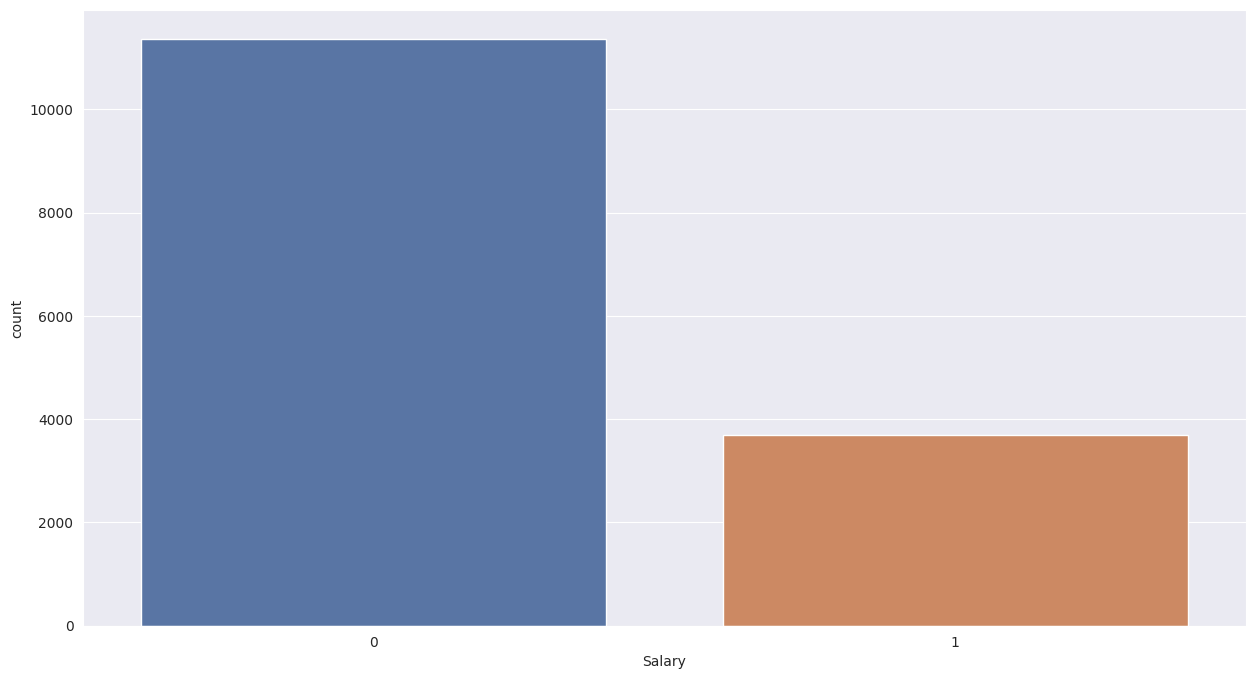

In [24]:
sns.countplot(x=data_train['Salary'])

In [25]:
le=LabelEncoder()
data_train['Salary']=le.fit_transform(data_train['Salary'])

workclass
Axes(0.125,0.11;0.775x0.77)
education
Axes(0.125,0.11;0.775x0.77)
maritalstatus
Axes(0.125,0.11;0.775x0.77)
occupation
Axes(0.125,0.11;0.775x0.77)
relationship
Axes(0.125,0.11;0.775x0.77)
race
Axes(0.125,0.11;0.775x0.77)
sex
Axes(0.125,0.11;0.775x0.77)
Salary
Axes(0.125,0.11;0.775x0.77)


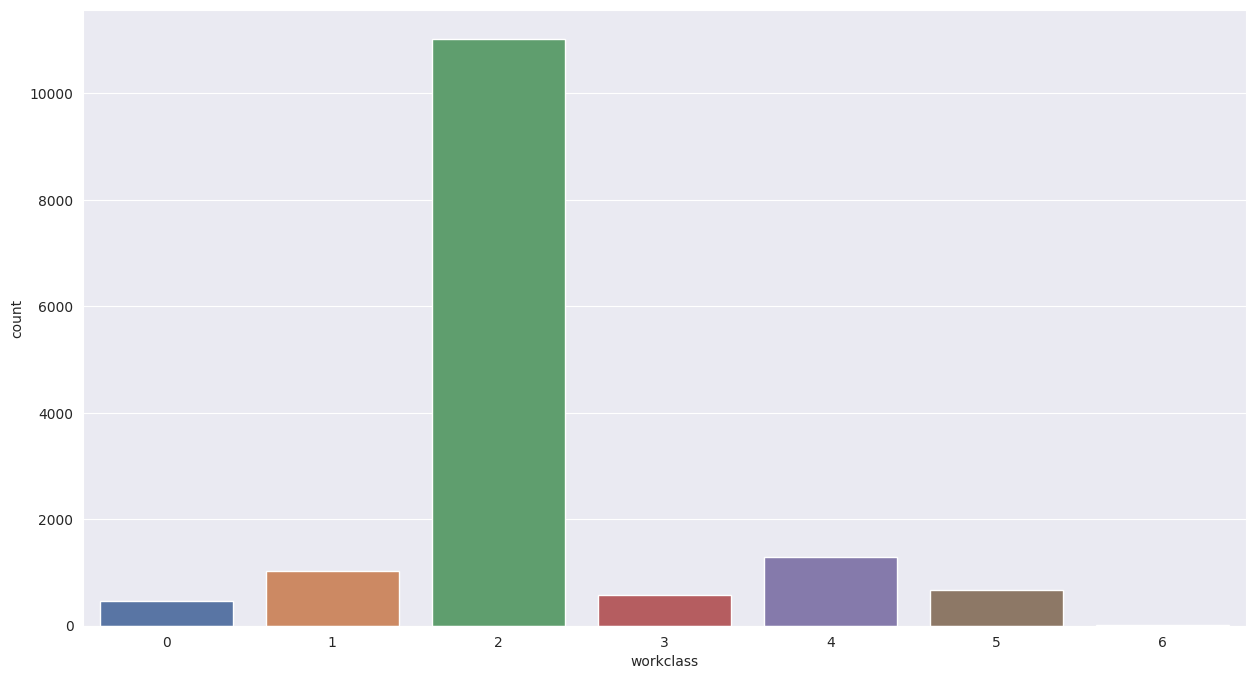

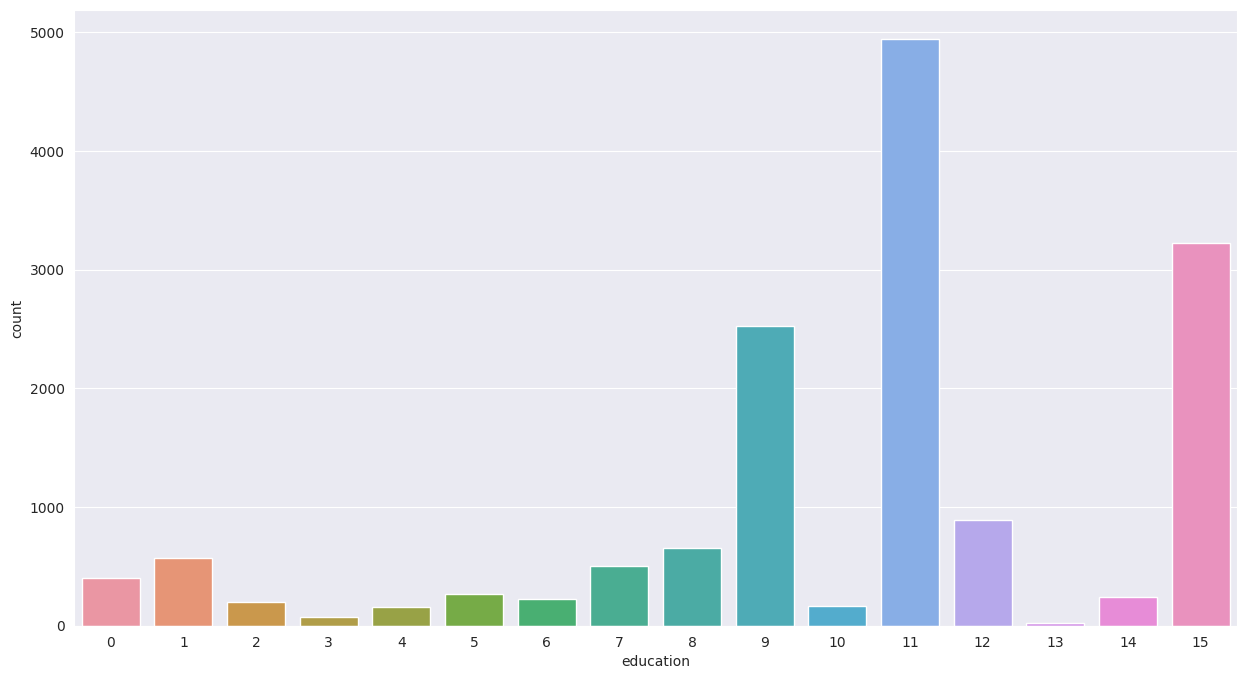

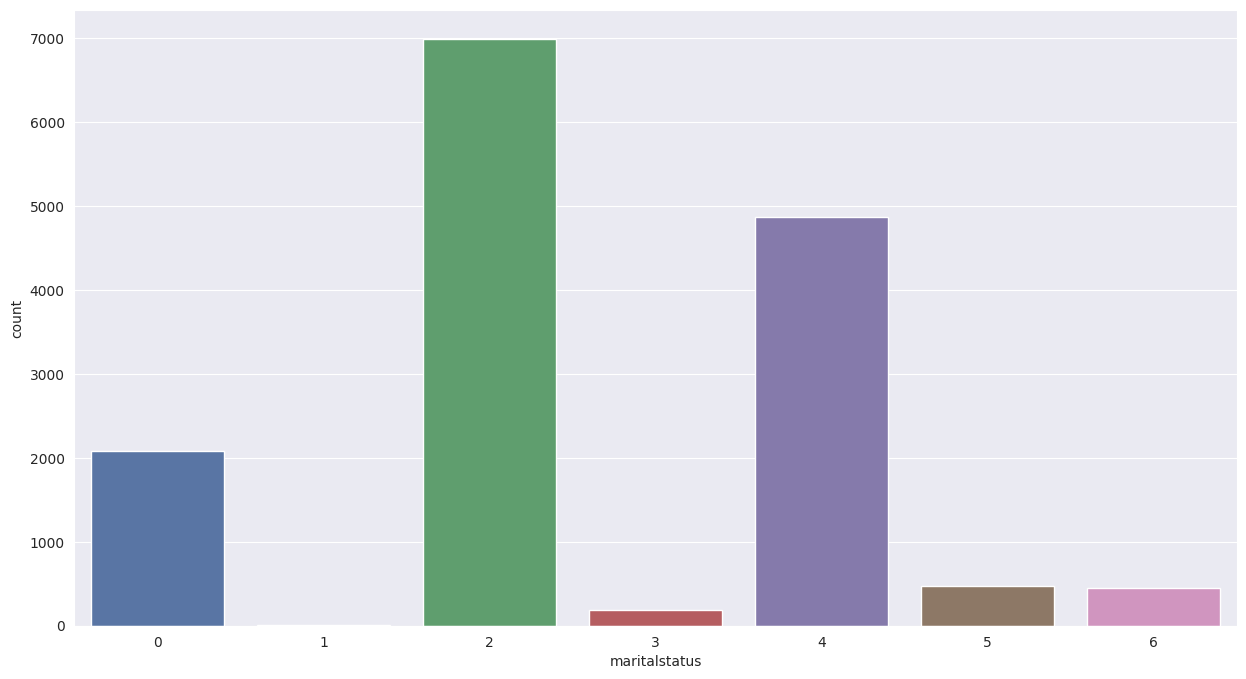

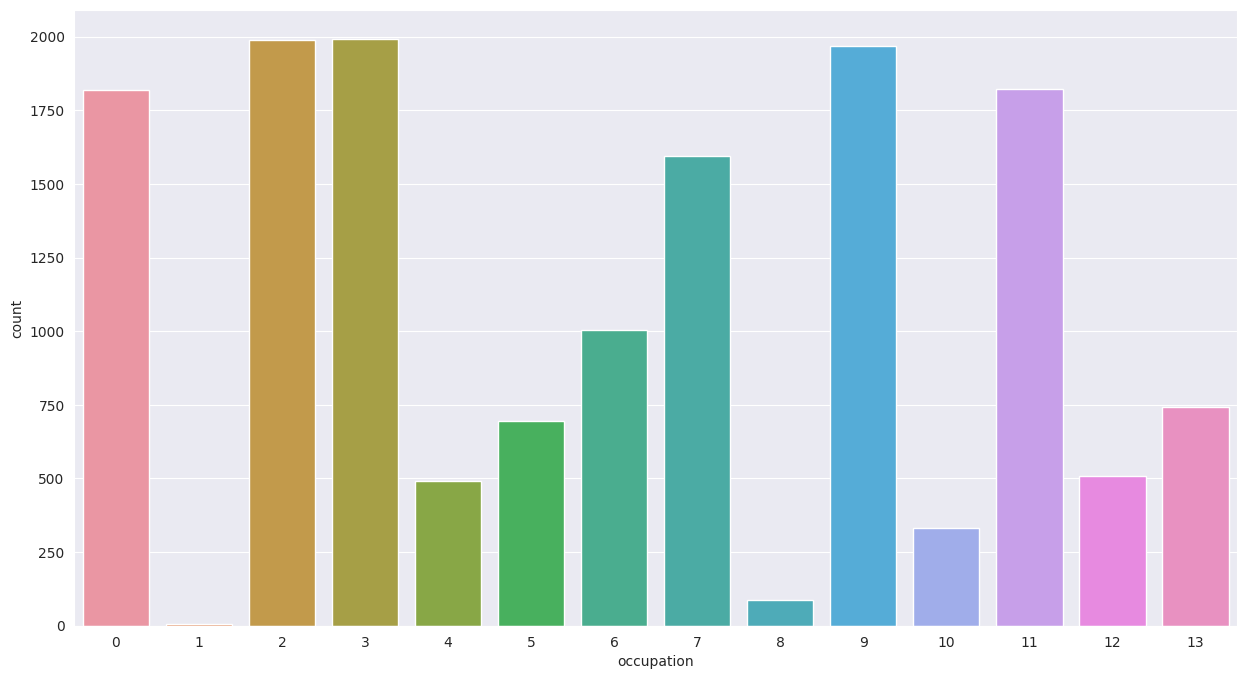

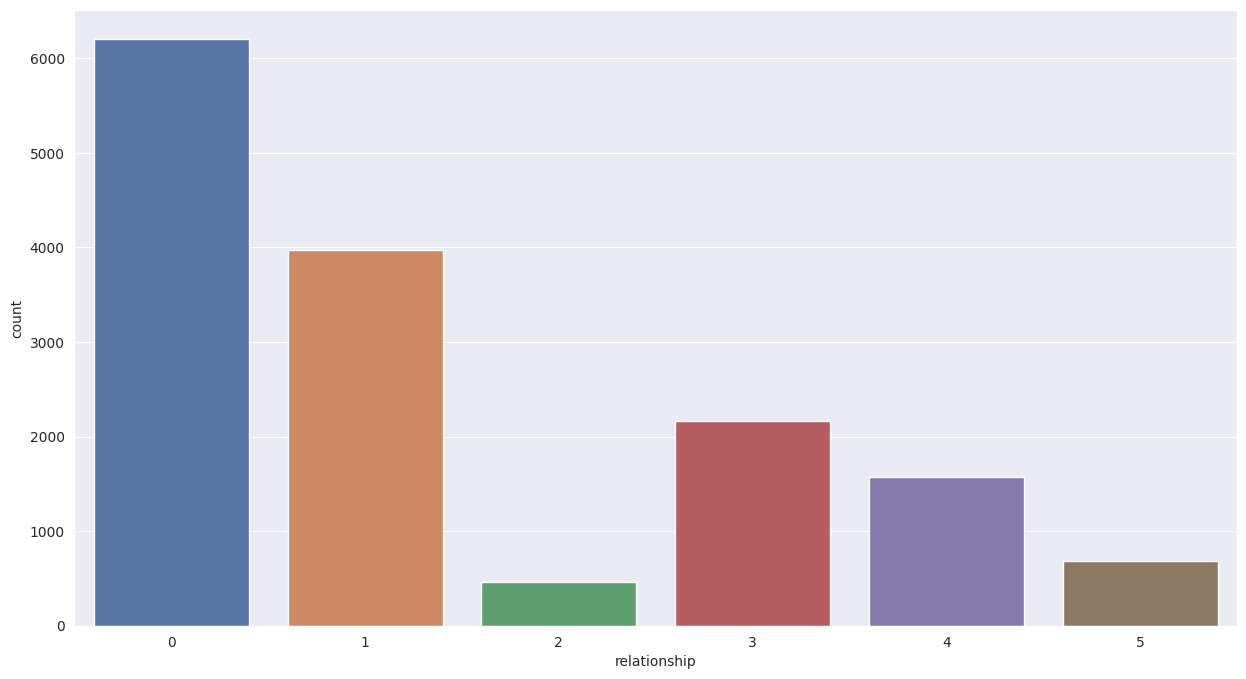

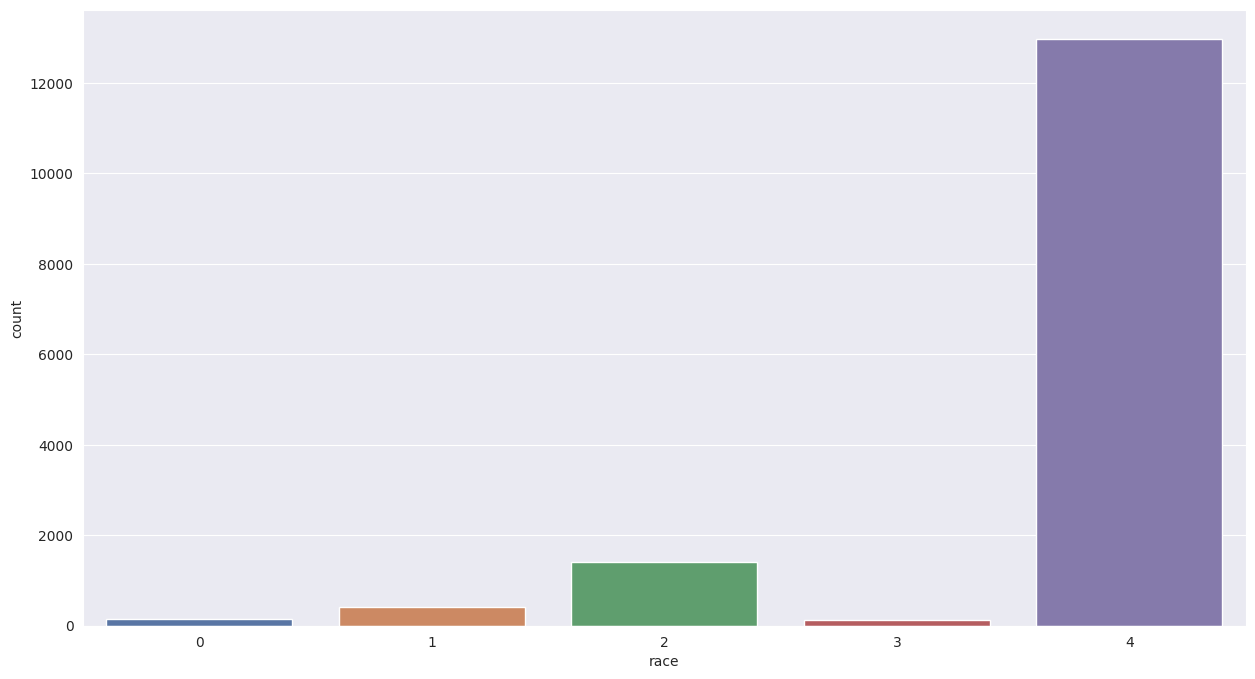

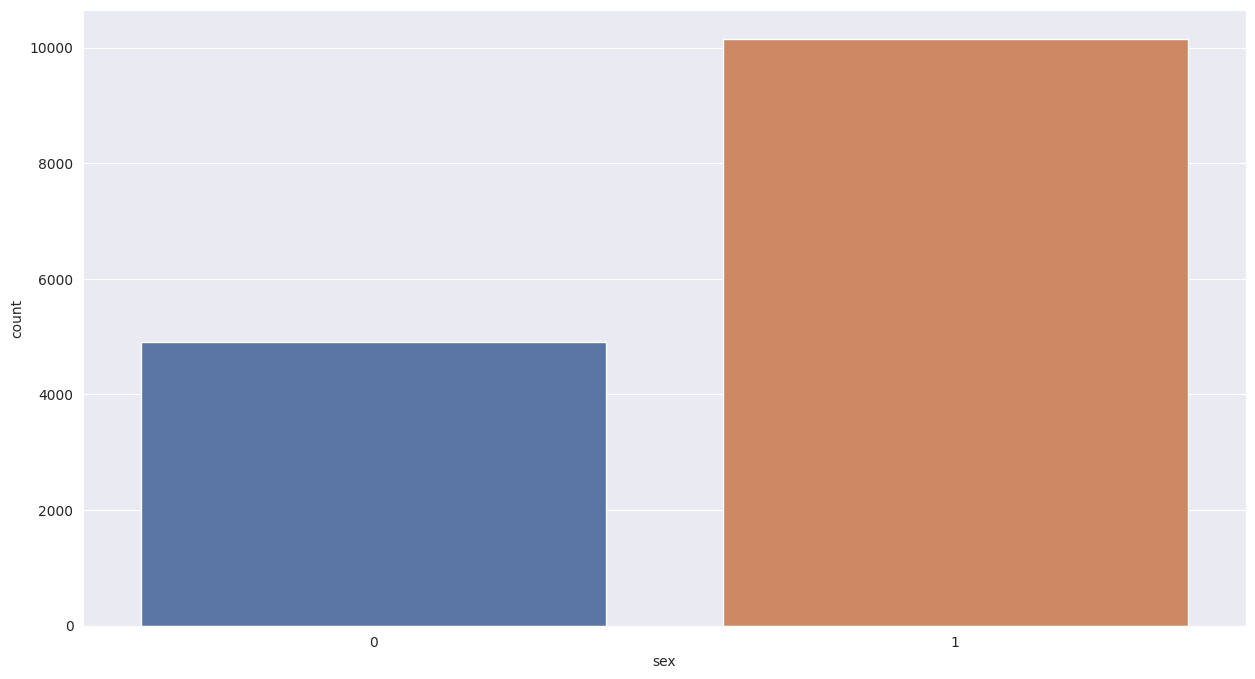

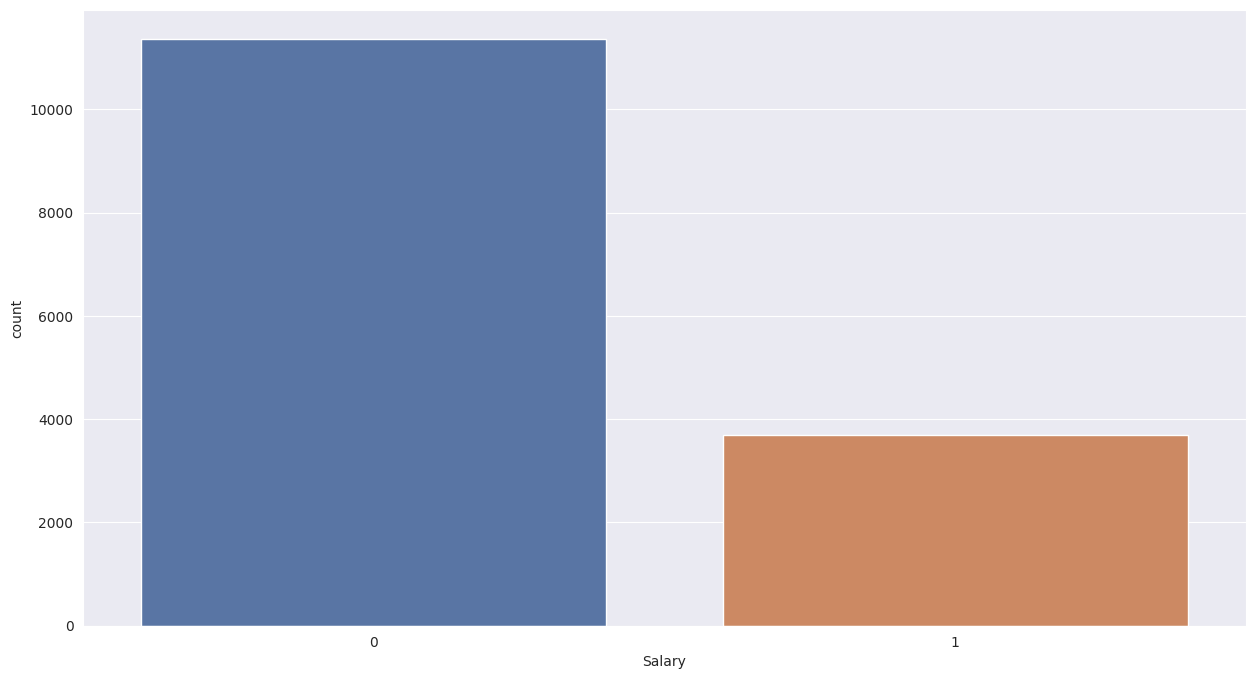

In [26]:
columns=['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
sns.set({'figure.figsize':(15,8)})
for i in columns:
  plt.figure()
  print(i)
  print(sns.countplot(x=i,data=data_train))

In [27]:
fig=px.pie(data_train,values='Salary',names='sex',hover_data=['Salary','sex'],labels={'Salary','sex'})
fig.show()

##**From this obsevation we can say that Men is doing more compared to Female with respect to job and also men**

In [28]:
data_train['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [29]:
fig=px.histogram(data_train,x='occupation',y='Salary',text_auto=True,color='occupation')
fig.show()

**With respect to Occupation exec-managerial is having the salary >=50K**

In [30]:
fig=px.histogram(data_train,x='workclass',y='Salary')
fig.show()

<ipython-input-31-3bc8ed069cd9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='capitalgain', ylabel='Density'>

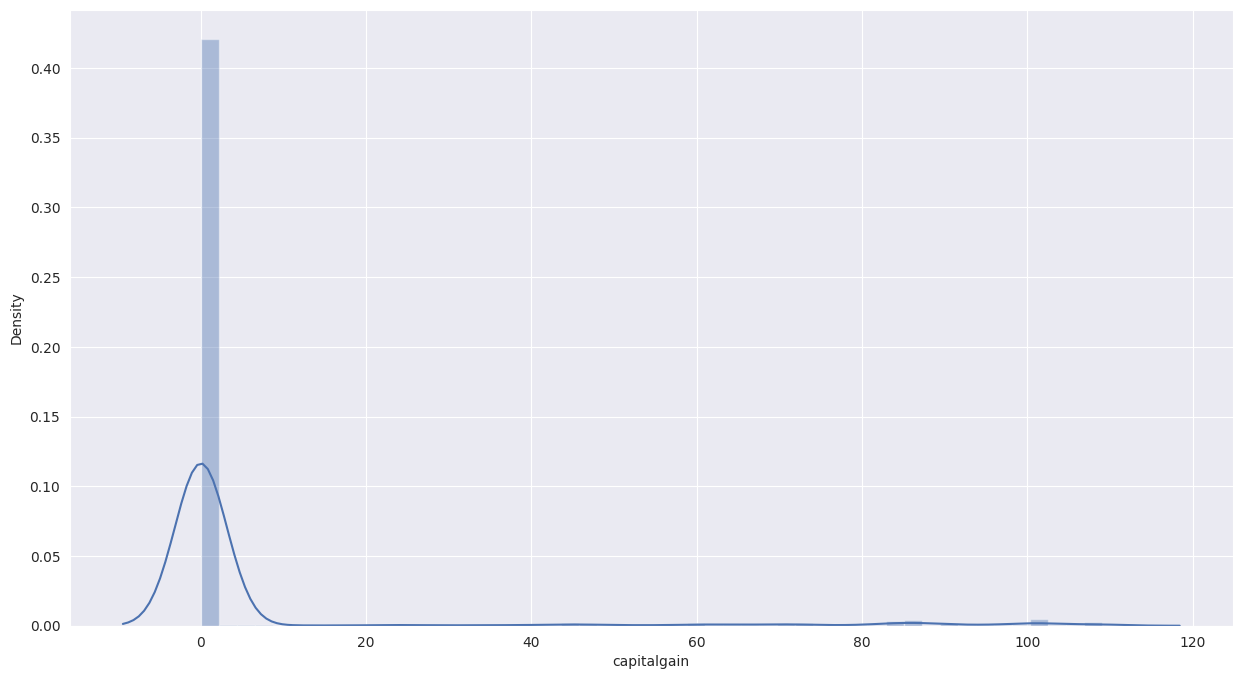

In [31]:
sns.distplot(data_train['capitalgain'])

<ipython-input-32-da0f5d4692c5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='capitalloss', ylabel='Density'>

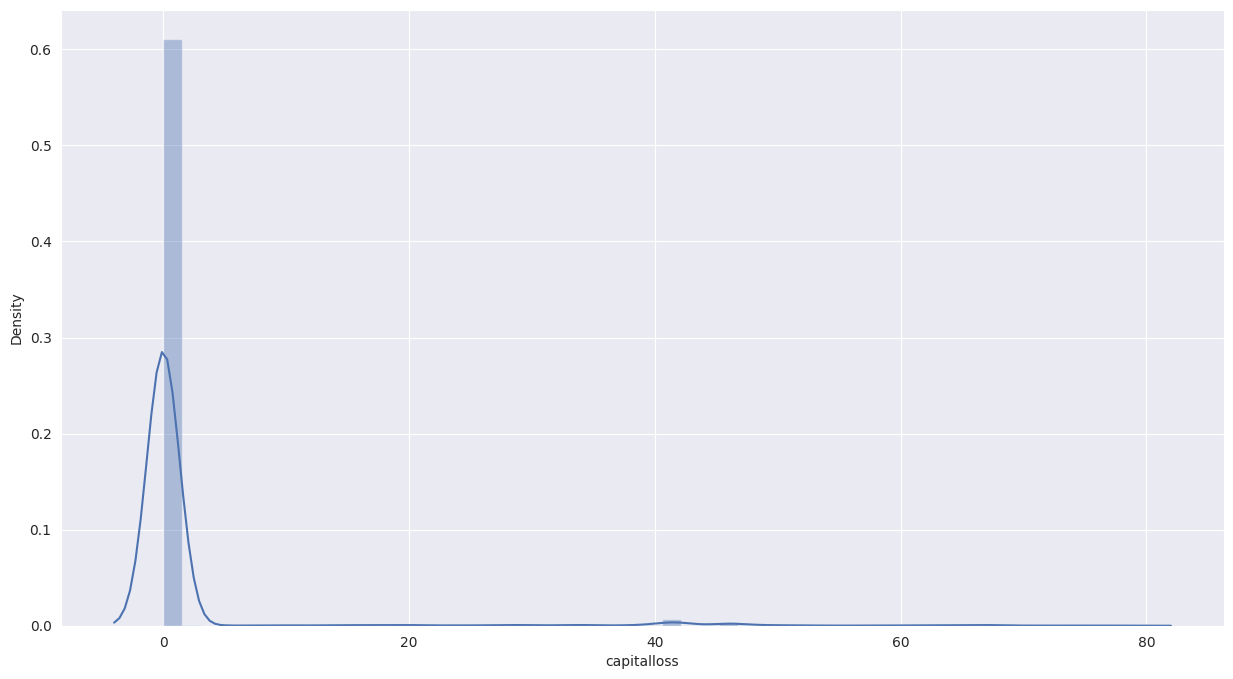

In [32]:
sns.distplot(data_train['capitalloss'])

**Private Sector is having the salary >=50K**

##**feature engineering**

In [33]:
columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
for i in columns:
  data_train[i]=le.fit_transform(data_train[i])

data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [34]:
le=LabelEncoder()

columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native','Salary']
for i in columns:
  data_test[i]=le.fit_transform(data_test[i])

data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


###**SPLITING DATA**

In [38]:
x_train1=data_train.iloc[:,:-1]
y_train1=data_train.iloc[:,-1]

In [39]:
x_test1=data_test.iloc[:,:-1]
y_test1=data_test.iloc[:,-1]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=0.2)

##**MODEL BUILDING LINEAR**

In [41]:
model=SVC(kernel='linear',C=0.01,gamma=0.1)
model.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1, kernel='linear')

In [42]:
y_pred_train=model.predict(x_train)

In [43]:
model.score(x_train,y_train)

0.8012118193891102

In [44]:
y_pred_test=model.predict(x_test)

In [45]:
accur_train=accuracy_score(y_test,y_pred_test)

In [46]:
print('Accuracy of train_dastaset :',accur_train)

Accuracy of train_dastaset : 0.8094289508632138


In [47]:
new_pred=model.predict(x_test1)

In [48]:
accu_test=accuracy_score(y_test1,new_pred)

In [49]:
print('Accuracy of test_dastaset :',accu_test)

Accuracy of test_dastaset : 0.802855245683931


##**Here we can say that,model is working properly.Because the trained model is working properly for dataset by increase in accuracy of 0.001.So,that there may be less chances for 'Overfitting'**

###**HYPERPARAMETER TUNNING**

In [50]:
model_rbf=SVC(kernel='rbf',C=0.01,gamma=0.1)
model_rbf.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1)

In [51]:
y_pred_trainrbf=model_rbf.predict(x_train)

In [52]:
y_pred_trainrbf=model_rbf.predict(x_test)

###**EVALUATING MODEL**

In [53]:
accuracy_score(y_test,y_pred_trainrbf)

0.7646082337317397

In [54]:
x_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

##**Testing the test data with trained model**

In [55]:
new_preb_rbf=model_rbf.predict(x_test)

In [56]:
accuracy_score(y_test,new_preb_rbf)

0.7543160690571049

###**NAVIEBAYES MODELS TUNING**

In [58]:
nb=MultinomialNB()
nb.fit(x_train1,y_train1)

MultinomialNB()

In [59]:
nb_pred_train=nb.predict(x_train)

In [60]:
nb_pred_test=nb.predict(x_test)

In [61]:
accu_trainmodel=accuracy_score(y_test,nb_pred_test)

In [62]:
accu_trainmodel

0.7804116865869853

In [63]:
new_pred_test=nb.predict(x_test1)

In [64]:
accu_testmodel=accuracy_score(y_test1,new_pred_test)

In [65]:
accu_testmodel

0.7804116865869853

In [66]:
x=['nb train model','nb test model']
y=[accu_trainmodel,accu_testmodel]
fig=px.bar(x=x,y=y,labels={'x':'accu_trainmodel','y':'accu_testmodel'},text_auto=True)
fig.show()

##**GaussianNB tuning**

In [67]:
gnb=GaussianNB()
gnb.fit(x_train1,y_train1)

GaussianNB()

In [68]:
y_pred_train=gnb.predict(x_train)

In [69]:
y_pred_test=gnb.predict(x_test)

In [70]:
accu_traingnb=accuracy_score(y_test,y_pred_test)

In [71]:
accu_traingnb

0.8135458167330677

In [72]:
new_pred=gnb.predict(x_test1)

In [75]:
accu_testgnb=accuracy_score(y_test1,new_pred)

In [76]:
accu_testgnb

0.8135458167330677

In [77]:
x=['accu_traingnb','accu_testgnb']
y=[accu_traingnb,accu_testgnb]
fig=px.bar(x=x,y=y,labels={'x':'accu_traingnb','y':'accu_testgnb'},text_auto=True)


fig.update_layout(title='Difference in accuracy ..',
                  title_font={'size':30,'family': 'Serif'},
                  paper_bgcolor='#D0D3D4',
                  plot_bgcolor='#D0D3D4')
fig.update_yaxes(showgrid=False)
fig.show()